In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [3]:
url = "https://raw.githubusercontent.com/ametoGiscarddEstaing/data-science-stuff/refs/heads/main/euro_2024.csv" # replace for your own filename
df = pd.read_csv(url, index_col=0, encoding='latin', on_bad_lines='skip', sep = ";")
#df = pd.read_csv(filename1, ) # gets the file and saves it in "df1"
#df_raw = pd.read_csv(filename1, encoding='latin', on_bad_lines='skip', sep = ";") # gets the file and saves it in "df1"

In [4]:
df

,version,doi,year,resp_id,country,countrycode,country_alpha2,d3,d4,d4_age,...,meta_end_date,meta_duration,meta_duration2,meta_consent,meta_mode,meta_vmobiledevice,Gen_by_age,Edu_rec,Weight1,Weight2
za_nr,,,,,,,,,,,,,,,,,,,,,
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560556,1,56,BE,2,1954,70,...,2024-06-17,1257,00:20:57,1,1,5,8,1,0.697848,0.734922
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560441,1,56,BE,2,1963,61,...,2024-06-16,1020,00:17:00,1,1,5,8,2,1.264243,1.338579
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560543,1,56,BE,1,1955,69,...,2024-06-17,893,00:14:53,1,1,5,4,3,0.671724,0.594819
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560161,1,56,BE,1,1963,61,...,2024-06-14,890,00:14:50,1,1,3,4,2,1.121143,1.191413
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560871,1,56,BE,2,1982,42,...,2024-06-18,1271,00:21:11,1,1,5,7,3,1.216125,1.117679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7521016,27,752,SE,2,1963,61,...,2024-06-24,709,00:11:49,1,1,3,8,2,1.406337,1.342382
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520797,27,752,SE,2,1992,32,...,2024-06-19,891,00:14:51,1,1,5,6,3,1.103413,1.064219
8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520288,27,752,SE,1,1999,25,...,2024-06-17,1192,00:19:52,1,1,1,2,3,0.927830,0.901989


In [5]:
df["d4_age"]

za_nr
8868    70
8868    61
8868    69
8868    61
8868    42
        ..
8868    61
8868    32
8868    25
8868    35
8868    24
Name: d4_age, Length: 25904, dtype: int64

In [6]:
vars = ["country_alpha2", "d8", "d2", "q2",  "q4", "q6", "q6n", "q9_3", "q9_6", "q9_5", "q12_1", "q12_2", "q12_3", "q12_4", "q12_5", "d3", "q17", "q13_6", "q13_8", "d9", "d4_age", "q16"]

In [7]:
df = df[vars]

In [8]:
df = df.loc[df["country_alpha2"] == "FR"]

In [10]:
df = df.drop("country_alpha2", axis = 1)

In [11]:
col_names = [
    "rural_urban",
    "education",
    "dem_satisfaction",
    "govt_approval",
    "vote_choice_EP",
    "vote_choice_EP_2",
    "vote_prop_lfi",
    "vote_prop_ps",
    "vote_prop_verts",
    "trade", 
    "redistrib", 
    "same_sex",
    "immigration",
    "climate",
    "gender", 
    "self_europe", 
    "politicians",
    "pro_ukraine",
    "religion",
    "age",
    "europe_good_bad"
]

In [12]:
df.columns = col_names

In [13]:
df = df[df < 97]

In [ ]:
my_formula = "pro_ukraine  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())


In [ ]:
df2 = df.copy()

In [ ]:
df2["vote_prop_lfi"].describe()

In [ ]:
df2["vote_prop_lfi_rec"] = 0

In [ ]:
mask = df2['lfi_vote_prop'] = 0 
df2['age_cat'] = 0
mask = df2['lfi_vote_prop'] = 0 
df2['age_cat'] = 0

In [ ]:
df2["vote_prop_lfi_rec"] = pd.cut(df2["vote_prop_lfi"], bins=[0, 3, 5, 8, 10], labels=["Jamais (0)", "Peu probable (1-3)", "Possible (4-7) ", "Probable"])


In [ ]:
df2

In [ ]:
help(sm.graphics)

In [18]:
df["education"].value_counts()

education
3.0    313
5.0    233
2.0    160
6.0    145
4.0    101
1.0     43
Name: count, dtype: int64

                            OLS Regression Results                            
Dep. Variable:            pro_ukraine   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     23.11
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           2.01e-25
Time:                        23:44:17   Log-Likelihood:                -1443.9
No. Observations:                 888   AIC:                             2902.
Df Residuals:                     881   BIC:                             2935.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6777      0.243     

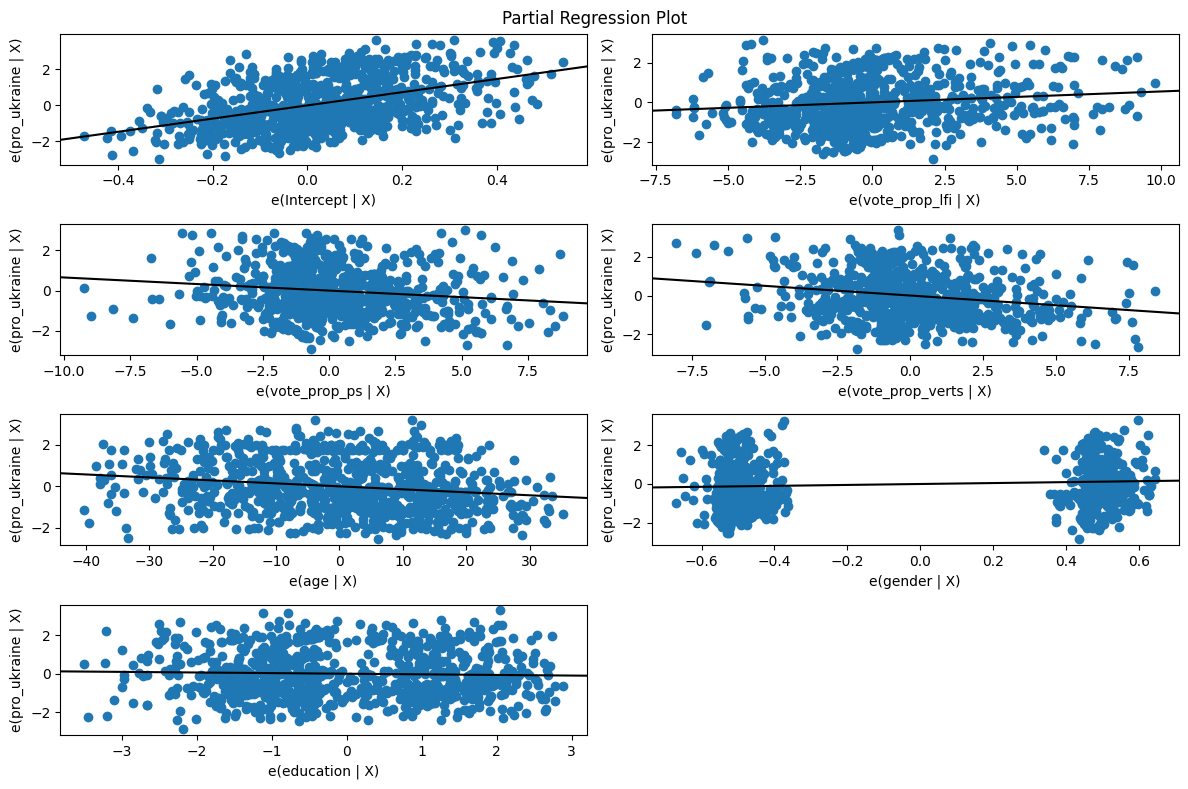

In [19]:
my_formula = "pro_ukraine  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + age + gender + education"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ukraine.png', bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:            self_europe   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     26.64
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           3.97e-29
Time:                        23:44:39   Log-Likelihood:                -2097.2
No. Observations:                 847   AIC:                             4208.
Df Residuals:                     840   BIC:                             4242.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9224      0.583     

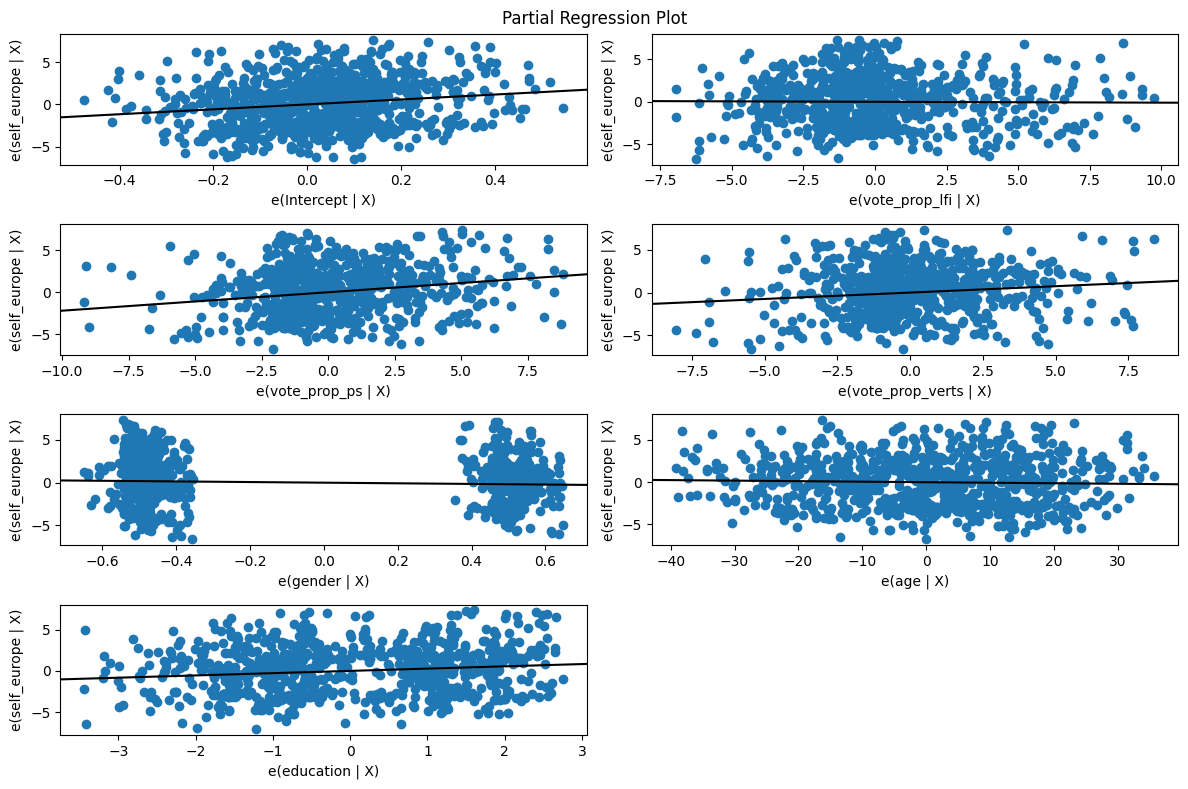

In [22]:
my_formula = "self_europe  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + gender + age + education"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('self_europe.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:        europe_good_bad   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     15.76
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           2.95e-17
Time:                        23:44:43   Log-Likelihood:                -1097.9
No. Observations:                 899   AIC:                             2210.
Df Residuals:                     892   BIC:                             2243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1661      0.162     

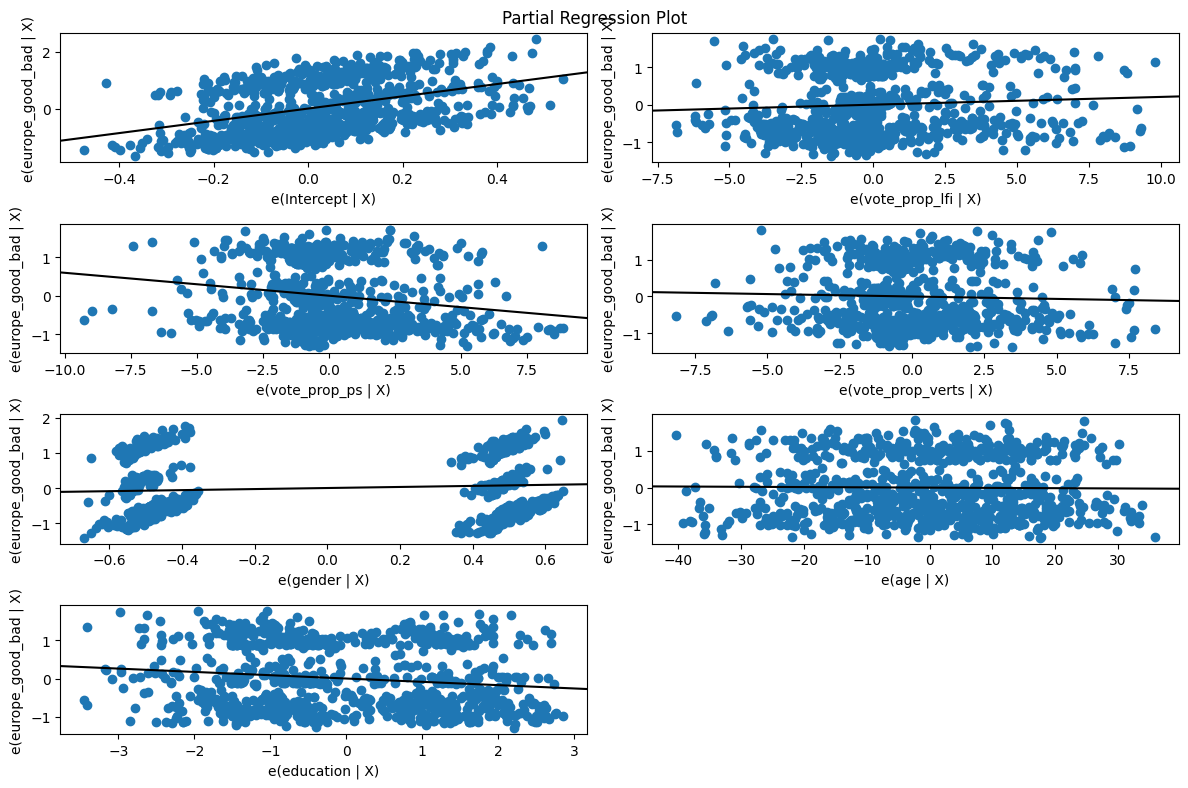

In [23]:
my_formula = "europe_good_bad  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + gender + age + education"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('europe.png', bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:               same_sex   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     9.346
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           5.77e-10
Time:                        23:45:20   Log-Likelihood:                -2453.8
No. Observations:                 913   AIC:                             4922.
Df Residuals:                     906   BIC:                             4955.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7776      0.692     

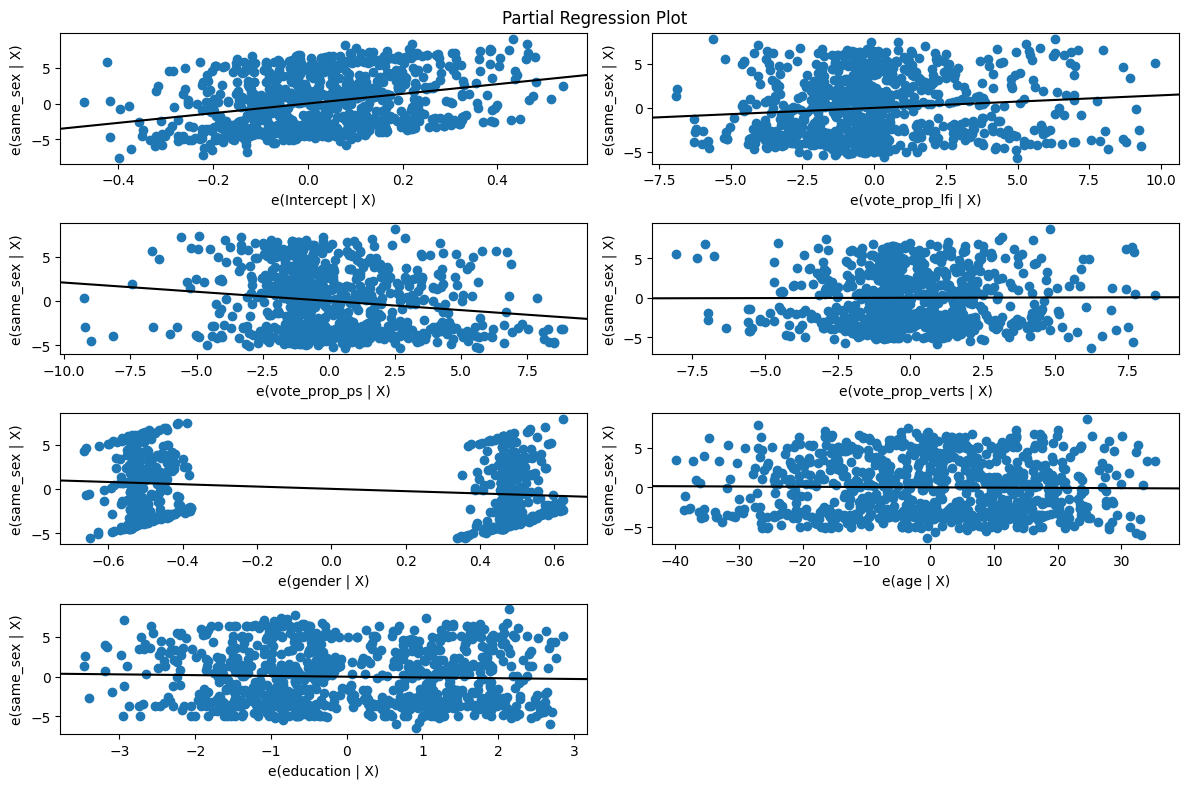

In [24]:
my_formula = "same_sex  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts + gender + age + education"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('same_sex.png', bbox_inches='tight')


In [ ]:
my_formula = "gender  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())


In [ ]:
my_formula2 = "vote_int ~ age + ideology"
model = smf.logit(formula=my_formula, data=df).fit()

In [ ]:
fig= plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model_2, fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
plt.figure()

In [ ]:
plt.hist(df_test[ax = "pro_ukraine"])
plt.show()

In [ ]:
df_test.plot.hist(alpha=0.5);

In [ ]:
vars_test = ["vote_prop_lfi", "vote_prop_ps", "vote_prop_verts"]

In [ ]:
df[vars_test].plot.kde()

In [ ]:
vars_test_2 = 

In [ ]:
pd.crosstab(df["vote_prop_lfi"], df["pro_ukraine"], normalize=True).plot(kind='bar', subplots=True);